In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import rtbm.layers as layers
import rtbm.model as mdl

import warnings
warnings.filterwarnings('ignore')

from rtbm.costfunctions import mse
from rtbm import minimizer

from rtbm.mathtools import theta_1d, logtheta_1d_phaseI
from riemann_theta.riemann_theta import RiemannTheta

import rtbm.layers as layers
import rtbm.model as mdl

import mpmath
from numpy import frompyfunc

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.


Process PoolWorker-11:
Process PoolWorker-16:
Process PoolWorker-14:
Process PoolWorker-6:
Process PoolWorker-15:
Process PoolWorker-4:
Process PoolWorker-7:
Process PoolWorker-2:
Process PoolWorker-1:
Process PoolWorker-8:
Process PoolWorker-10:
Process PoolWorker-5:
Process PoolWorker-9:
Process PoolWorker-3:
Process PoolWorker-13:
Process PoolWorker-12:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
Traceback (most recent cal

# Derivatives test

In [ ]:
Q=np.zeros((1,1), dtype=complex)
V=np.zeros((1,1), dtype=complex)
V[0,0]=0.1*2j*np.pi
Q[0,0]=0.01*2*np.pi

#print(theta_1d(V,Q,0))


print(RiemannTheta(V/(2j*np.pi),1j*Q/(2*np.pi), derivs=[[1],[1]]))

#print(RiemannTheta(V/(2j*np.pi),1j*Q/(2*np.pi), derivs=[[1],[1]]))

#mpmath.jtheta(3,V[0,0],Q[0,0])

In [ ]:
X=np.random.uniform(-50, 50,(1000,1))

In [ ]:
%%time
t = RiemannTheta(X/(2j*np.pi),1j*Q/(2*np.pi))

In [ ]:
test= frompyfunc(lambda z, q: mpmath.jtheta(3, z, q), 2, 1)

In [ ]:
%%time
t = test(np.pi*X/(2j*np.pi),np.exp(1j*np.pi*1j*Q[0,0]/(2*np.pi)))

In [ ]:
Q=np.zeros((1,1), dtype=float)
V=np.zeros((1,1), dtype=float)
V[0,0]=0.1
Q[0,0]=0.01


print(theta_1d(V,Q,0))
print(np.exp(logtheta_1d_phaseI(V,Q,0)))

print(RiemannTheta(V/(2j*np.pi),-1*Q/(2j*np.pi)))

In [ ]:
41.0/25.0

# Linear layer test

In [ ]:
def funcA(x):
    return 0.6-0.3*x

def funcB(x):
    return -0.5+0.8*x


def func(x1,x2):
    return 0.6-0.3*x1+1.2*x2

X1 = np.linspace(-5.3, 5, 1000)
X2 = np.linspace(-5.5, 5, 1000)

X = np.stack((X1,X2))

#Y = func(X1,X2).reshape((1,X.shape[1]))
Y = np.stack((funcA(X1),funcB(X2)))

M = mdl.Model()
M.add(layers.Linear(2,2))

#minim = minimizer.CMA(True)
#minim.train(mse(), M, X, Y, tolfun=1e-3)

M = mdl.Model()
M.add(layers.Linear(2,1))
M.add(layers.Linear(1,2))


minim = minimizer.SGD()
minim.train(mse(), M, X, Y, lr=0.0001,maxiter=1000)

# E(h|v) SGD test

Iteration 0 in 0.17(s), cost = 3.890650
Iteration 100 in 17.30(s), cost = 0.343258
Iteration 200 in 34.87(s), cost = 0.274312
Iteration 300 in 51.04(s), cost = 0.330445
Iteration 400 in 68.21(s), cost = 0.320018
Iteration 500 in 83.68(s), cost = 0.295134
Iteration 600 in 101.77(s), cost = 0.262422
Iteration 700 in 120.08(s), cost = 0.287274
Iteration 800 in 137.89(s), cost = 0.281316
Iteration 900 in 155.32(s), cost = 0.252349
('Cost: ', (0.2798370337682663+0j))
('Sol: ', array([ 0.23029163+0.j, -3.47559085+0.j,  3.97070306+0.j]))
Time: 171 s


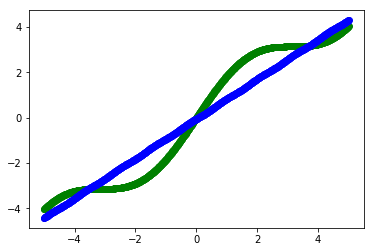

In [4]:
def func(x):
    return np.sin(x)+x

X = np.linspace(-5, 5, 1000)
X = X.reshape((1,X.shape[0]))

Y = func(X[:,None]).reshape((1,X.shape[1]))

M = mdl.Model()
M.add(layers.DiagExpectationUnitLayer(1,1))

minim = minimizer.SGD()

minim.train(mse(), M, X, Y, lr=0.1,maxiter=1000,noise=0.01)

plt.plot(X.flatten(), Y.flatten(),"og-", label='fit')
plt.plot(X.flatten(), np.real(M.predict(X)).flatten(),"ob-", label='fit')

CMA on 16 cpu(s) enabled
(3_w,7)-aCMA-ES (mu_w=2.3,w_1=58%) in dimension 3 (seed=660358, Thu Nov  2 12:39:19 2017)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      7 1.626009140707921e+00 1.0e+00 8.76e-01  8e-01  9e-01 0:00.1
    2     14 1.800004113966434e+00 1.3e+00 1.21e+00  1e+00  1e+00 0:00.2
    3     21 2.928040739326359e-01 1.6e+00 1.19e+00  1e+00  1e+00 0:00.3
   39    273 2.500103113824538e-01 5.6e+01 3.43e-02  4e-03  3e-02 0:03.3
   99    693 2.499620693309519e-01 1.6e+02 6.65e-03  4e-05  9e-04 0:07.3
  100    700 2.499620692496768e-01 1.5e+02 5.48e-03  3e-05  7e-04 0:07.4
  132    924 2.499620692092238e-01 1.5e+02 1.60e-04  1e-07  3e-06 0:09.7
CMAEvolutionStrategyResult(xbest=array([-9.16256569e-10, -3.42053550e+00,  3.63379244e+00]), fbest=(0.24996206920922384+0j), evals_best=919, evaluations=924, iterations=132, xfavorite=array([-2.27036292e-08, -3.42053630e+00,  3.63379330e+00]), stds=array([1.41656365e-07, 3.06723896e-06, 3.28484987e-06

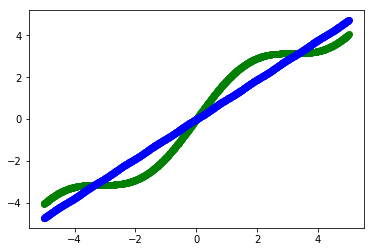

In [9]:
M = mdl.Model()
M.add(layers.DiagExpectationUnitLayer(1,1))

minim = minimizer.CMA(True)

minim.train(mse(), M, X, Y, maxiter=1000)
plt.plot(X.flatten(), Y.flatten(),"og-", label='fit')
plt.plot(X.flatten(), np.real(M.predict(X)).flatten(),"ob-", label='fit')

In [ ]:
def func(x1,x2):
    return 0.2*x1+0.4*x2+0.8

X1 = np.linspace(-5.3, 5, 1000)
X2 = np.linspace(-5.5, 5, 1000)

X = np.stack((X1,X2))

Y = func(X1[:,None],X2[:,None]).reshape((1,X1.shape[0]))

M = mdl.Model()
M.add(layers.DiagExpectationUnitLayer(2,1))
M.add(layers.DiagExpectationUnitLayer(1,1))


minim = minimizer.SGD()
minim.train(mse(), M, X, Y, lr=0.1,maxiter=400)

#plt.plot(X.flatten(), Y.flatten(),"og-", label='fit')
#plt.plot(X.flatten(), np.real(M.predict(X)).flatten(),"ob-", label='fit')

# Layer test

In [ ]:
M = mdl.Model()
M.add(layers.DiagExpectationUnitLayer(1,3))
M.add(layers.DiagExpectationUnitLayer(3,1))

In [ ]:
def func(x):
    return np.sin(x)

X = np.linspace(0, 10, 5)
X = X.reshape((1,X.shape[0]))

Y = func(X[:,None]).reshape((1,X.shape[1]))

In [ ]:
plt.plot(X.flatten(), Y.flatten(),"ob-")

In [ ]:
minim = minimizer.CMA(True)
minim.train(mse(), M, X, Y, tolfun=1e-3)

In [ ]:
npoints = 5
test_X = (np.linspace(0, 10, npoints)).reshape((1, npoints))

plt.plot(X.flatten(), Y.flatten(),"og-", label='target')
plt.plot(test_X.flatten(), np.real(M.predict(test_X)).flatten(),"ob-", label='fit')
plt.legend()

# Misc tests

In [ ]:
L = layers.MaxPosLayer(3,1)

In [ ]:
L.feedin(np.array([Y,2*Y,1*Y]).reshape(3,5))

In [ ]:
np.array([Y,2*Y,Y]).reshape(3,5)

In [ ]:
np.empty(0)

In [ ]:
derivative_1d_theta_phaseI([0.1],[1j],0)